In [ ]:
# Importing python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Ignoring ununnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# To read the csv file(dataset)
df = pd.read_csv('SalaryData.csv')
display(df)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [ ]:
# Load the dataset
data = {
    'Age': [32.0, 28.0, 45.0, 36.0, 52.0, 35.0, 43.0, 29.0, 34.0, 44.0],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Education Level': ["Bachelor's", "Master's", "PhD", "Bachelor's", "Master's", "Bachelor's", "Master's", "Bachelor's", "Bachelor's", "PhD"],
    'Job Title': ['Software Engineer', 'Data Analyst', 'Senior Manager', 'Sales Associate', 'Director', 'Senior Marketing Analyst', 'Director of Operations', 'Junior Project Manager', 'Senior Operations Coordinator', 'Senior Business Analyst'],
    'Years of Experience': [5.0, 3.0, 15.0, 7.0, 20.0, 8.0, 19.0, 2.0, 7.0, 15.0],
    'Salary': [90000.0, 65000.0, 150000.0, 60000.0, 200000.0, 85000.0, 170000.0, 40000.0, 90000.0, 150000.0]
}

df = pd.DataFrame(data)

In [ ]:
# Getting basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  10 non-null     float64
 1   Gender               10 non-null     object 
 2   Education Level      10 non-null     object 
 3   Job Title            10 non-null     object 
 4   Years of Experience  10 non-null     float64
 5   Salary               10 non-null     float64
dtypes: float64(3), object(3)
memory usage: 608.0+ bytes


In [ ]:
# Checking the number of rows and columns in our dataset
df.shape

(10, 6)

**Data Cleaning**

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


<Axes: >

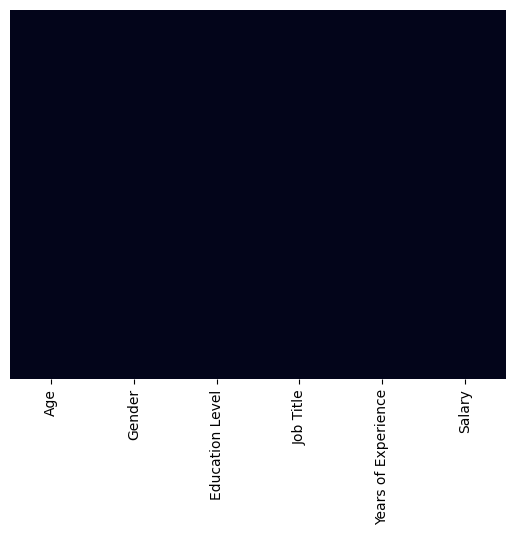

In [ ]:
# To check and remove missing(null) values with heatmap
print(df.isnull().sum())
df=df.dropna()
sns.heatmap(df.isnull(),yticklabels=False, cbar=False)

In [ ]:
# To convert categorical variables to numeric
df["Gender"] = df["Gender"].astype('category')
df["Gender"] = df["Gender"].cat.codes
df["Education Level"] = df["Education Level"].astype('category')
df["Education Level"] = df["Education Level"].cat.codes
df["Job Title"] = df["Job Title"].astype('category')
df["Job Title"] = df["Job Title"].cat.codes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  10 non-null     float64
 1   Gender               10 non-null     int8   
 2   Education Level      10 non-null     int8   
 3   Job Title            10 non-null     int8   
 4   Years of Experience  10 non-null     float64
 5   Salary               10 non-null     float64
dtypes: float64(3), int8(3)
memory usage: 398.0 bytes


**Exploratory Data Analysis(EDA)**

In [ ]:
# Getting some statistical information of our data
df.describe()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
count,10.000000,10.000000,10.000000,10.00000,10.000000,10.00000
mean,37.800000,0.500000,0.700000,4.50000,10.100000,110000.00000
std,7.828722,0.527046,0.823273,3.02765,6.590397,53489.35512
min,28.000000,0.000000,0.000000,0.00000,2.000000,40000.00000
25%,32.500000,0.000000,0.000000,2.25000,5.500000,70000.00000
50%,35.500000,0.500000,0.500000,4.50000,7.500000,90000.00000
75%,43.750000,1.000000,1.000000,6.75000,15.000000,150000.00000
max,52.000000,1.000000,2.000000,9.00000,20.000000,200000.00000


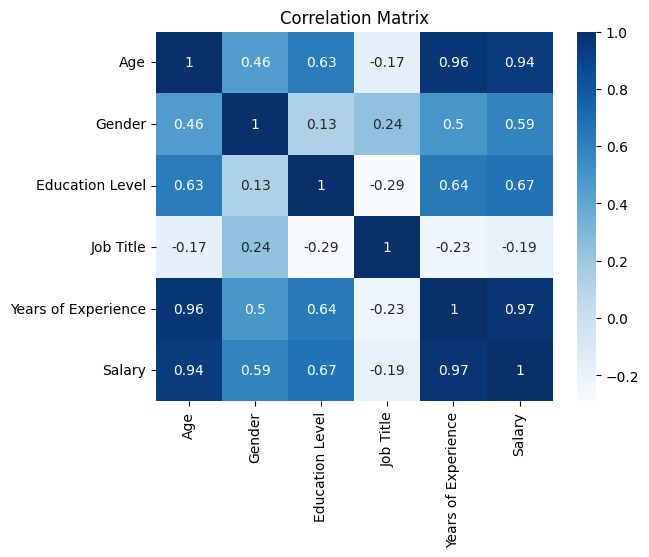

In [ ]:
# Correlation matrix to identify linear relationships
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title("Correlation Matrix")
plt.show()

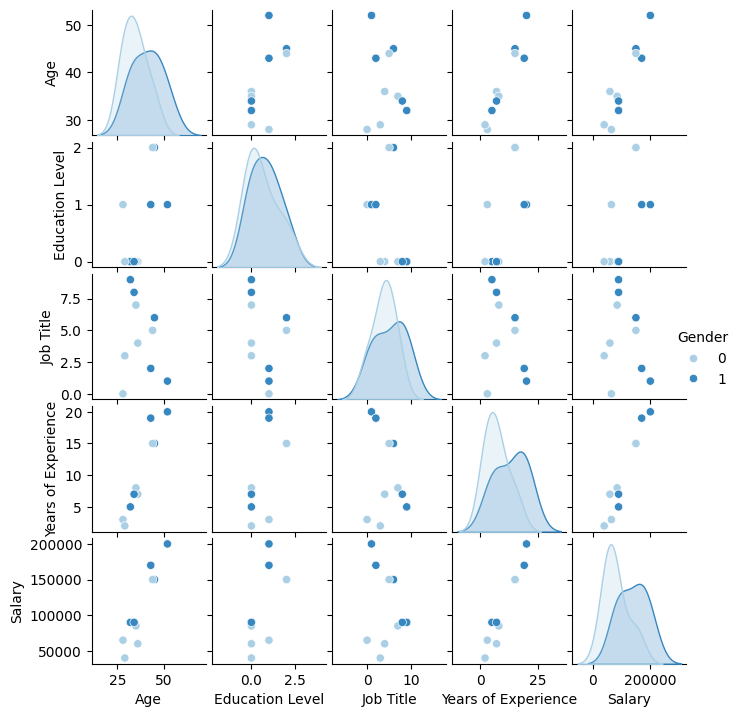

In [ ]:
# Pairplot to visualize relationships between numerical variables
sns.pairplot(df,hue='Gender',palette='Blues')
plt.gcf().set_size_inches(7, 7)
plt.show()

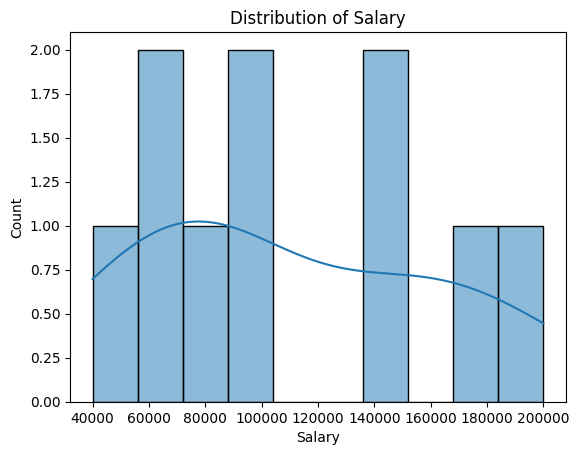

In [ ]:
# Visualize the distribution of Salary
sns.histplot(df['Salary'], bins=10, kde=True,palette='Blues')
plt.title('Distribution of Salary')
plt.show()

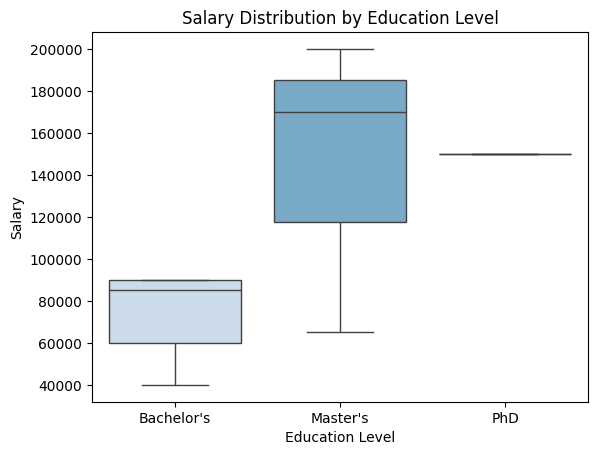

In [ ]:
# Boxplot to compare salaries by education level
sns.boxplot(x='Education Level', y='Salary', data=df, palette='Blues')
plt.title("Salary Distribution by Education Level")
plt.show()

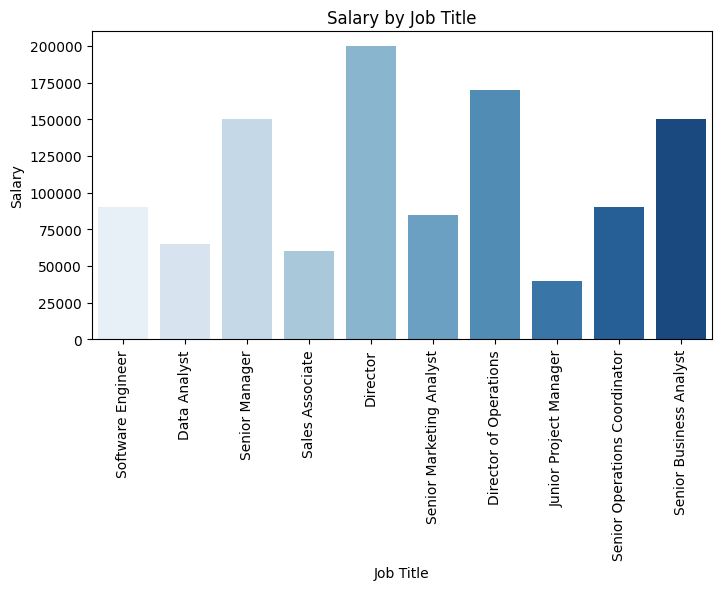

In [ ]:
# Barplot to compare Salary distribution by Job Title
plt.figure(figsize=(8, 4))
sns.barplot(x='Job Title', y='Salary', data=df, palette='Blues')
plt.title('Salary by Job Title')
plt.xticks(rotation=90)
plt.show()

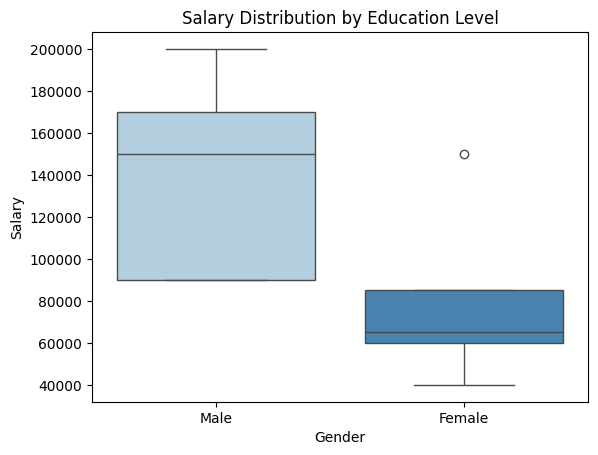

In [ ]:
# Boxplot to compare salaries by gender
sns.boxplot(x='Gender', y='Salary', data=df, palette='Blues')
plt.title('Salary Distribution by Education Level')
plt.show()

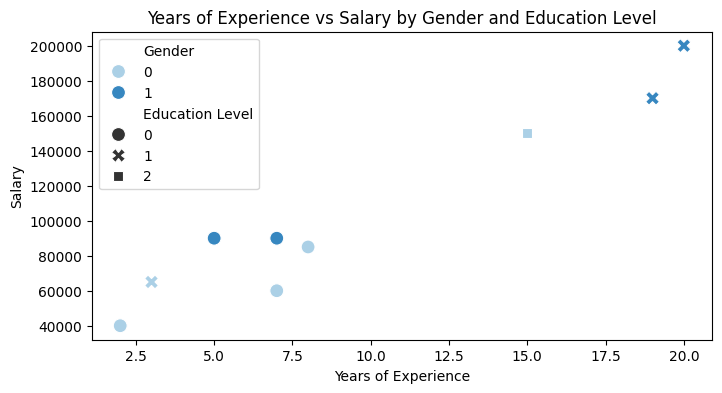

In [ ]:
# Scatterplot of Years of Experience vs Salary, considering Gender and Education Level
plt.figure(figsize=(8, 4))
sns.scatterplot(x="Years of Experience", y="Salary", hue="Gender", style="Education Level", data=df, s=100, palette="Blues")
plt.title("Years of Experience vs Salary by Gender and Education Level")
plt.show()